In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocessed-goemotions-dataset/valid_data.csv
/kaggle/input/preprocessed-goemotions-dataset/train_data.csv
/kaggle/input/preprocessed-goemotions-dataset/test_data.csv
/kaggle/input/preprocessed-goemotions-dataset/train_dataset.csv
/kaggle/input/preprocessed-goemotions-dataset/test_dataset.csv


In [19]:
import pandas as pd
df_train = pd.read_csv(r"/kaggle/input/preprocessed-goemotions-dataset/train_dataset.csv")
df_test = pd.read_csv(r"/kaggle/input/preprocessed-goemotions-dataset/test_dataset.csv")
display(df_train.shape)
display(df_test.shape)
display(df_train.shape[0] + df_test.shape[0])

(39894, 30)

(9974, 30)

49868

In [11]:
df_train.head()

,cleaned_text,emotion,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,let us give two contracts good measure,approval,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,safety dance naxxramas would favorite boss fig...,love,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,fuck man did not plan crying cure today,anger,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,post made smile cut dog,admiration,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,name roasting liberal cocks compilation 43,admiration,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
emotions = set(df_train['emotion'])
print(emotions)

{'fear', 'nervousness', 'relief', 'pride', 'embarrassment', 'optimism', 'annoyance', 'love', 'sadness', 'grief', 'approval', 'excitement', 'gratitude', 'anger', 'confusion', 'remorse', 'desire', 'joy', 'realization', 'surprise', 'caring', 'disapproval', 'amusement', 'admiration', 'curiosity', 'neutral', 'disappointment', 'disgust'}


In [30]:
positive = {'admiration','amusement','approval','caring','desire','excitement','gratitude','joy','love','optimism','pride','relief'}
negative = {'sadness','fear','embarrassment','disapproval','disappointment','annoyance','anger','nervousness','remorse','grief','disgust'}
ambiguous = {'realization','surprise','curiosity','confusion','neutral'}

print(f'Fine grained emotions: {len(emotions)}')
print(f'Number of data: {len(df_train)}')
print(f'Number of positive emotions: {len(positive)}') 
print(f'Number of negative emotions: {len(negative)}')
print(f'Number of ambiguous emotions: {len(ambiguous)}')
print(f'Number of total emotions: {len(positive)+len(negative)+len(ambiguous)}')

Fine grained emotions: 28
Number of data: 39894
Number of positive emotions: 12
Number of negative emotions: 11
Number of ambiguous emotions: 5
Number of total emotions: 28


In [47]:
emotions_sorted = list(positive) + list(negative) + list(ambiguous) 

In [48]:
groups = ['positive'] * len(positive) + ['negative'] * len(negative) + ['ambiguous'] * len(ambiguous)

In [49]:
df_emotions = pd.DataFrame({'emotions':emotions_sorted, 'groups':groups})
df_emotions

,emotions,groups
0,love,positive
1,caring,positive
2,amusement,positive
3,approval,positive
4,relief,positive
5,pride,positive
6,excitement,positive
7,optimism,positive
8,gratitude,positive
9,admiration,positive


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

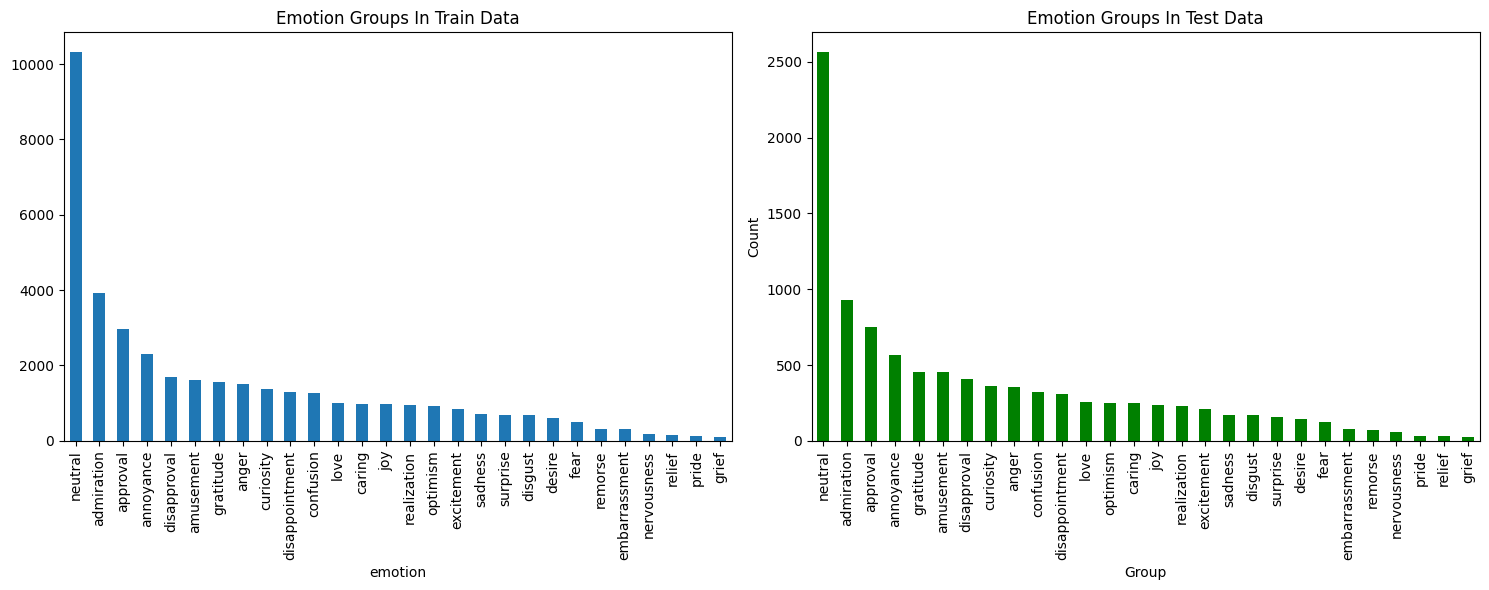

In [94]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df_train['emotion'].value_counts().plot(kind='bar', label = 'train')
plt.title('Emotion Groups In Train Data')
plt.subplot(1, 2, 2)
df_test['emotion'].value_counts().plot(kind='bar', color = 'green', label = 'test')
plt.title('Emotion Groups In Test Data')
plt.xlabel('Group')
plt.ylabel('Count')
plt.tight_layout()
# plt.legend()
plt.show()


In [65]:
import numpy as np

In [113]:
# Preview of data
display(df_test[['cleaned_text','emotion']].sample(5))

,cleaned_text,emotion
1213,hi everyone,neutral
3590,dive sweet sweet goodness muddy view meet woma...,joy
6358,never thought good point cursed witted rose un...,neutral
1674,i am sure could find unsatisfied women looking...,approval
3823,population control russia,neutral


In [137]:
train_data = df_train['cleaned_text']
test_data = df_test['emotion']

In [138]:
train_data.shape

(39894,)

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
test_data

0       disapproval
1            desire
2           neutral
3          optimism
4         gratitude
           ...     
9969    realization
9970         caring
9971        neutral
9972        neutral
9973      gratitude
Name: emotion, Length: 9974, dtype: object

In [141]:
X_train, X_test= train_test_split(train_data, test_size=0.2, random_state=50)

In [142]:
y_train, y_test= train_test_split(test_data, test_size=0.2, random_state=50)

In [143]:
print('X_train',X_train)
print()
print('X_test',X_test)
print()
print('y_train',y_train)
print()
print('y_test',y_test)

X_train 19672    familiar situation best nebraska team decades see
36251                             because likes eat garage
10070    glad came senses go feel uncomfortable old fun...
6852      missed wistful thinking hoping would team little
3915     also whirlpool seems begged sometime stays lik...
                               ...                        
34887                                      seasons premise
32022    deserve animals give loving do not talk silly ...
22637      yeah you are able fulfill hopefully bonus worth
38368        rule always played like rule feels weird slow
14000                             wise words ufartatronach
Name: cleaned_text, Length: 31915, dtype: object

X_test 15572                                         denial crazy
9635     seriously i have catching loving one since fir...
37497    sorry burst bubble dinners write history since...
19111    ill look do not mind language misogyny pretty ...
5002     correct still play nl faceoff 98 always t

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000, max_df=0.85)
vectorizer.fit(X_train)

TfidfVectorizer(max_df=0.85, max_features=3000, stop_words='english')

In [146]:
vectorizer.fit(X_test)

TfidfVectorizer(max_df=0.85, max_features=3000, stop_words='english')